# Image Reconstruction with AutoEncoders

- Using the same data (MNIST) with previous model, with a few changes. After this part image noise reduction comes.

In [30]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random
from numpy import reshape

In [2]:
import tensorflow as tf
from tensorflow.keras.layers import Flatten, Reshape, Dense, Input
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.datasets import mnist
from tensorflow.keras.optimizers import SGD

Init Plugin
Init Graph Optimizer
Init Kernel


In [3]:
(xTrain, _), (xTest, _) = mnist.load_data()

In [4]:
random.seed(1111)

In [5]:
random_idx = random.randint(0, len(xTrain) - 1)
random_idx

14260

In [6]:
random_img = xTrain[random_idx]

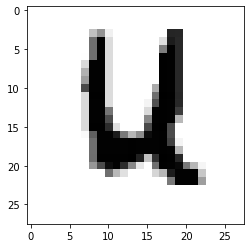

In [7]:
plt.imshow(random_img, cmap= 'binary')

In [8]:
xTrain = xTrain.astype('float32') / 255.
xTest = xTest.astype('float32') / 255.

In [9]:
print(xTrain.shape)
print(xTest.shape)

(60000, 28, 28)
(10000, 28, 28)


In [10]:
xTrainBatch, xTrainShape1, xTrainShape2 = xTrain.shape
xTestBatch, xTestShape1, xTestShape2 = xTest.shape

# Encoder

In [11]:
input_shape = xTrainShape1 *  xTrainShape2
latent_size = 25

In [12]:
encoder = Sequential()

encoder.add(Flatten(input_shape= [xTrainShape1, xTrainShape2]))
encoder.add(Dense(units= 450, activation= 'relu'))
encoder.add(Dense(units= 400, activation= 'relu'))
encoder.add(Dense(units= 350, activation= 'relu'))
encoder.add(Dense(units= 300, activation= 'relu'))
encoder.add(Dense(units= 250, activation= 'relu'))
encoder.add(Dense(units= 200, activation= 'relu'))
encoder.add(Dense(units= 150, activation= 'relu'))
encoder.add(Dense(units= 100, activation= 'relu'))

Metal device set to: Apple M1


2022-08-05 12:00:24.267546: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-08-05 12:00:24.267661: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [13]:
encoder.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 450)               353250    
_________________________________________________________________
dense_1 (Dense)              (None, 400)               180400    
_________________________________________________________________
dense_2 (Dense)              (None, 350)               140350    
_________________________________________________________________
dense_3 (Dense)              (None, 300)               105300    
_________________________________________________________________
dense_4 (Dense)              (None, 250)               75250     
_________________________________________________________________
dense_5 (Dense)              (None, 200)               5

# BottleNeck

In [14]:
bottleNeckInp = Input(shape= (100,))
bottleNeckOutp = Dense(units= latent_size, activation= 'relu')(bottleNeckInp)
                     
bottleNeck = Model(bottleNeckInp, bottleNeckOutp)

In [15]:
bottleNeck.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 100)]             0         
_________________________________________________________________
dense_8 (Dense)              (None, 25)                2525      
Total params: 2,525
Trainable params: 2,525
Non-trainable params: 0
_________________________________________________________________


# Decoder

In [16]:
decoder = Sequential()

decoder.add(Dense(units= 100, activation= 'relu'))
decoder.add(Dense(units= 150, activation= 'relu'))
decoder.add(Dense(units= 200, activation= 'relu'))
decoder.add(Dense(units= 250, activation= 'relu'))
decoder.add(Dense(units= 300, activation= 'relu'))
decoder.add(Dense(units= 350, activation= 'relu'))
decoder.add(Dense(units= 400, activation= 'relu'))
decoder.add(Dense(units= 450, activation= 'relu'))

decoder.add(Dense(units= input_shape, activation= 'sigmoid'))
decoder.add(Reshape([xTrainShape1, xTrainShape2]))
decoder.build(input_shape= [None, latent_size])

In [17]:
decoder.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 100)               2600      
_________________________________________________________________
dense_10 (Dense)             (None, 150)               15150     
_________________________________________________________________
dense_11 (Dense)             (None, 200)               30200     
_________________________________________________________________
dense_12 (Dense)             (None, 250)               50250     
_________________________________________________________________
dense_13 (Dense)             (None, 300)               75300     
_________________________________________________________________
dense_14 (Dense)             (None, 350)               105350    
_________________________________________________________________
dense_15 (Dense)             (None, 400)              

In [18]:
autoEncoder = Sequential([encoder, bottleNeck, decoder])

In [20]:
autoEncoder.compile(loss= 'binary_crossentropy', optimizer= SGD(learning_rate= 1.5), 
                   metrics= ['accuracy'])

In [21]:
autoEncoder.fit(xTrain, xTrain, validation_data= (xTest, xTest), epochs= 10)

2022-08-05 12:02:31.433440: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLIR Optimization Passes are enabled (registered 2)
2022-08-05 12:02:31.436642: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


Epoch 1/10


2022-08-05 12:02:31.682349: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


1874/1875 [============================>.] - ETA: 0s - loss: 0.2593 - accuracy: 0.0795

2022-08-05 12:02:53.050934: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


1875/1875 [==============================] - 23s 12ms/step - loss: 0.2593 - accuracy: 0.0795 - val_loss: 0.2338 - val_accuracy: 0.0987
Epoch 2/10
1875/1875 [==============================] - 23s 12ms/step - loss: 0.2203 - accuracy: 0.1136 - val_loss: 0.2116 - val_accuracy: 0.1277
Epoch 3/10
1875/1875 [==============================] - 23s 12ms/step - loss: 0.1971 - accuracy: 0.1471 - val_loss: 0.1834 - val_accuracy: 0.1661
Epoch 4/10
1875/1875 [==============================] - 23s 12ms/step - loss: 0.1794 - accuracy: 0.1742 - val_loss: 0.1764 - val_accuracy: 0.1726
Epoch 5/10
1875/1875 [==============================] - 23s 12ms/step - loss: 0.1685 - accuracy: 0.1878 - val_loss: 0.1622 - val_accuracy: 0.1959
Epoch 6/10
1875/1875 [==============================] - 23s 12ms/step - loss: 0.1602 - accuracy: 0.1983 - val_loss: 0.1568 - val_accuracy: 0.2035
Epoch 7/10
1875/1875 [==============================] - 23s 12ms/step - loss: 0.1538 - accuracy: 0.2066 - val_loss: 0.1493 - val_accura

In [22]:
accuracyFrame = pd.DataFrame(autoEncoder.history.history)

In [23]:
accuracyFrame

,loss,accuracy,val_loss,val_accuracy
0,0.259262,0.079523,0.233791,0.098661
1,0.220267,0.113634,0.211630,0.127746
2,0.197110,0.147064,0.183413,0.166132
3,0.179445,0.174194,0.176423,0.172575
4,0.168524,0.187815,0.162197,0.195932
5,0.160203,0.198328,0.156793,0.203468
6,0.153757,0.206593,0.149287,0.213239
7,0.148105,0.213308,0.158727,0.206714
8,0.143484,0.218355,0.143477,0.214750
9,0.139227,0.223321,0.136984,0.219643


<AxesSubplot:xlabel='Epochs', ylabel='Loss'>

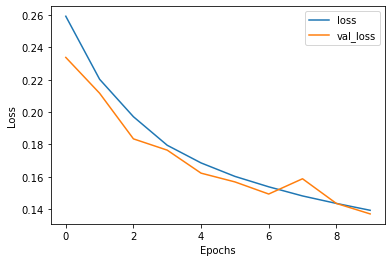

In [26]:
accuracyFrame[['loss', 'val_loss']].plot(xlabel= 'Epochs', ylabel= 'Loss')

<AxesSubplot:xlabel='Epochs', ylabel='Accuracy'>

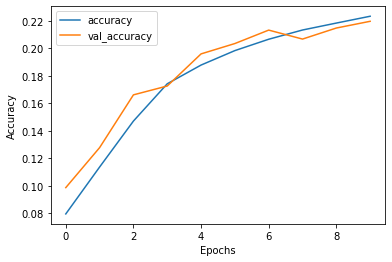

In [27]:
accuracyFrame[['accuracy', 'val_accuracy']].plot(xlabel= 'Epochs', ylabel= 'Accuracy')

In [28]:
autoEncoder.save('work')
autoEncoder.save('neural_net')

2022-08-05 12:36:39.543026: W tensorflow/python/util/util.cc:348] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


INFO:tensorflow:Assets written to: work/assets
INFO:tensorflow:Assets written to: neural_net/assets


In [33]:
encoded_images = encoder.predict(xTest)
bottle_neck_images = bottleNeck.predict(encoded_images)
decoded_images = decoder.predict(bottle_neck_images)
decoded_images.shape

2022-08-05 12:43:08.039654: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-08-05 12:43:08.285443: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


(10000, 28, 28)

In [35]:
pred_images = reshape(decoded_images, newshape= (decoded_images.shape[0], 28, 28))

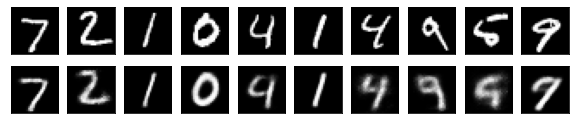

In [36]:
n = 10
plt.figure(figsize=(10, 2))
for i in range(n): 
    ax = plt.subplot(2, n, i + 1)
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    plt.imshow(xTest[i].reshape(28, 28))
    plt.gray()
 
    ax = plt.subplot(2, n, i + 1 + n)
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    plt.imshow(pred_images[i].reshape(28, 28))

## Test with a Random Index Generated

In [37]:
random_idx = random.randint(0, len(xTest) - 1)

Original Image: 


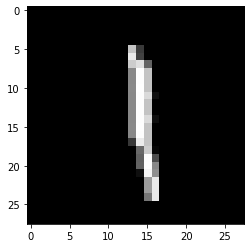

Attempted Reconstruction (After Autoencoder)


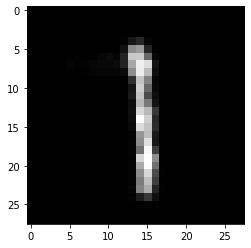

In [38]:
print('Original Image: ')
plt.imshow(xTest[random_idx])
plt.show()
print('Attempted Reconstruction (After Autoencoder)')
plt.imshow(pred_images[random_idx])

# Image Noise Reduction

In [39]:
from tensorflow.keras.layers import GaussianNoise

In [45]:
sample = GaussianNoise(0.2)
noisey_images = sample(xTest[:10], training= True)

In [41]:
random_idx = random.randint(0, 9)

ORIGINAL


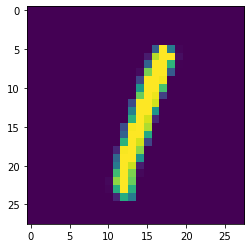

NOISEY IMAGE


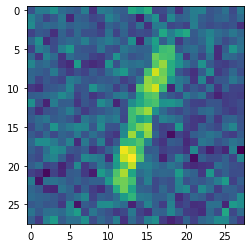

In [48]:
print('ORIGINAL')
plt.imshow(xTest[random_idx], cmap= 'viridis')
plt.show()
print('NOISEY IMAGE')
plt.imshow(noisey_images[random_idx], cmap= 'viridis')
plt.show()

In [49]:
np.random.seed(1111)
tf.random.set_seed(1111)

## Encoder for Noise Reduction

In [50]:
encoder = Sequential()

encoder.add(Flatten(input_shape= [xTrainShape1, xTrainShape2]))
encoder.add(GaussianNoise(0.2))

encoder.add(Dense(units= 450, activation= 'relu'))
encoder.add(Dense(units= 400, activation= 'relu'))
encoder.add(Dense(units= 350, activation= 'relu'))
encoder.add(Dense(units= 300, activation= 'relu'))
encoder.add(Dense(units= 250, activation= 'relu'))
encoder.add(Dense(units= 200, activation= 'relu'))
encoder.add(Dense(units= 150, activation= 'relu'))
encoder.add(Dense(units= 100, activation= 'relu'))

## BottleNeck for Noise Reduction

In [51]:
bottleNeckInp = Input(shape= (100,))
bottleNeckOutp = Dense(units= latent_size, activation= 'relu')(bottleNeckInp)
                     
bottleNeck = Model(bottleNeckInp, bottleNeckOutp)

## Decoder for Noise Reduction

In [52]:
decoder = Sequential()

decoder.add(Dense(units= 100, activation= 'relu'))
decoder.add(Dense(units= 150, activation= 'relu'))
decoder.add(Dense(units= 200, activation= 'relu'))
decoder.add(Dense(units= 250, activation= 'relu'))
decoder.add(Dense(units= 300, activation= 'relu'))
decoder.add(Dense(units= 350, activation= 'relu'))
decoder.add(Dense(units= 400, activation= 'relu'))
decoder.add(Dense(units= 450, activation= 'relu'))

decoder.add(Dense(units= input_shape, activation= 'sigmoid'))
decoder.add(Reshape([xTrainShape1, xTrainShape2]))
decoder.build(input_shape= [None, latent_size])

In [53]:
noise_remover = Sequential([encoder, bottleNeck, decoder])

In [54]:
noise_remover.compile(loss= 'binary_crossentropy', optimizer= 'adam', 
                     metrics= ['accuracy'])

In [55]:
noise_remover.fit(xTrain, xTrain, epochs= 10)

Epoch 1/10
   1/1875 [..............................] - ETA: 15:43 - loss: 0.6931 - accuracy: 0.0502

2022-08-05 13:13:35.877779: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


1875/1875 [==============================] - 23s 12ms/step - loss: 0.2209 - accuracy: 0.1202
Epoch 2/10
1875/1875 [==============================] - 23s 12ms/step - loss: 0.1918 - accuracy: 0.1619
Epoch 3/10
1875/1875 [==============================] - 23s 12ms/step - loss: 0.1781 - accuracy: 0.1821
Epoch 4/10
1875/1875 [==============================] - 23s 12ms/step - loss: 0.1729 - accuracy: 0.1889
Epoch 5/10
1875/1875 [==============================] - 22s 12ms/step - loss: 0.1675 - accuracy: 0.1960
Epoch 6/10
1875/1875 [==============================] - 22s 12ms/step - loss: 0.1660 - accuracy: 0.1984
Epoch 7/10
1875/1875 [==============================] - 23s 12ms/step - loss: 0.1638 - accuracy: 0.2023
Epoch 8/10
1875/1875 [==============================] - 23s 12ms/step - loss: 0.1629 - accuracy: 0.2026
Epoch 9/10
1875/1875 [==============================] - 23s 12ms/step - loss: 0.1604 - accuracy: 0.2055
Epoch 10/10
1875/1875 [==============================] - 23s 12ms/step - lo

## Testing with First 10 Images

In [56]:
tenNoiseyImages = sample(xTest[:10], training= True)
tenDenoisedImages = noise_remover(tenNoiseyImages)

In [65]:
from tensorflow.python.ops.numpy_ops import np_config
np_config.enable_numpy_behavior()

ORIGINAL IMAGES


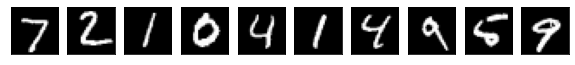

NOISED IMAGES


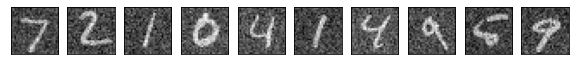

AFTER NOISE REMOVAL FROM AUTOENCODER


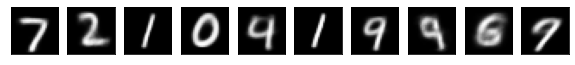

In [72]:
# her basliga subplot olustur
# plot for each heading
n = 10
print('ORIGINAL IMAGES')

plt.figure(figsize=(10, 2))
for i in range(n): 
    ax = plt.subplot(2, n, i + 1)
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    plt.imshow(xTest[i].reshape(28, 28))
    plt.gray()
plt.show()

print('NOISED IMAGES')
plt.figure(figsize=(10, 2))
for i in range(n):
    ax = plt.subplot(2, n, i + 1)
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    plt.imshow(tenNoiseyImages[i])
    plt.gray()
plt.show()

print('AFTER NOISE REMOVAL FROM AUTOENCODER')
plt.figure(figsize=(10, 2))
for i in range(n):
    ax = plt.subplot(2, n, i + 1)
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    plt.imshow(tenDenoisedImages[i])
    plt.gray()
plt.show()